# Post-Training: Experimental Place Cells


This notebook compares the place cells entering the training pipeline, to the place cells reconstructed by the decoder.

## Setup

In [1]:
import os
import subprocess

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "neuralgeom"))
print("Working directory: ", os.getcwd())

import warnings

warnings.filterwarnings("ignore")

import sys

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

Working directory:  /Volumes/GoogleDrive/My Drive/code/neuralgeom/neuralgeom
Directory added to path:  /Volumes/GoogleDrive/My Drive/code/neuralgeom
Directory added to path:  /Volumes/GoogleDrive/My Drive/code/neuralgeom/neuralgeom


## Imports

In [17]:
import datasets.experimental as experimental
import matplotlib.pyplot as plt
import numpy as np
import torch

TRAINED_MODELS = os.path.join(os.getcwd(), "results/trained_models")
print(f"Trained models are saved in the directory:\n{TRAINED_MODELS}")

Trained models are saved in the directory:
/Volumes/GoogleDrive/My Drive/code/neuralgeom/neuralgeom/results/trained_models


## Plot experimental place cell activity at each angle

In [10]:
expt_id = 41
timestep_ns = int(1e6)

print(f"Loading experiment {expt_id}...")
place_cells, labels = experimental.load_place_cells(
    expt_id=expt_id, timestep_microsec=timestep_ns
)

thetas = np.array(labels["angles"])
sort = np.argsort(thetas)
sorted_thetas = thetas[sort]

sorted_place_cells = place_cells[sort, :]

INFO: # - Found file at data/binned/expt41_times_timestep1000000.txt! Loading...
INFO: # - Found file at data/binned/expt41_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at data/binned/expt41_labels_timestep1000000.txt! Loading...


Loading experiment 41...


In [11]:
print(place_cells.shape)
print(sorted_place_cells.shape)

(3882, 12)
(3882, 12)


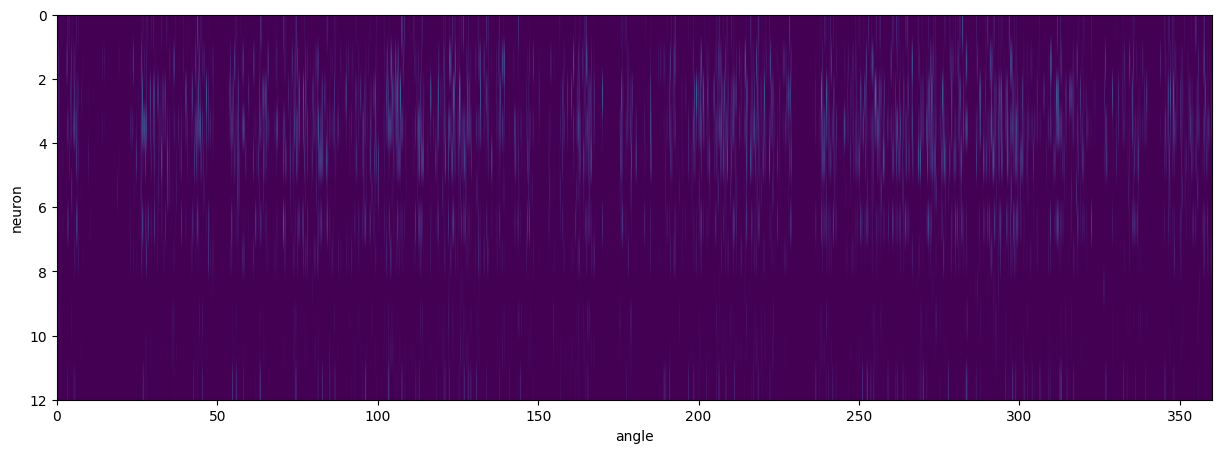

In [12]:
plt.figure(figsize=(20, 5))
plt.xlabel("angle")
plt.ylabel("neuron")

plt.imshow(sorted_dataset.T, extent=[0, 360, sorted_dataset.shape[1], 0], aspect=10);

## Inspect reconstructed place cells

We chose a trained model and inspect the reconstructed place cell activity.

In [18]:
model_path = os.path.join(TRAINED_MODELS, "experimental_2022-10-27 14:54:00_model.pt")
model = torch.load(model_path)

dataset = torch.Tensor(place_cells)
recon, params = model(dataset)

recon = recon.detach().numpy()
sorted_rec = recon[sort, :]

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/GoogleDrive/My Drive/code/neuralgeom/neuralgeom/results/trained_models/experimental_2022-10-27 14:54:00_model.pt'

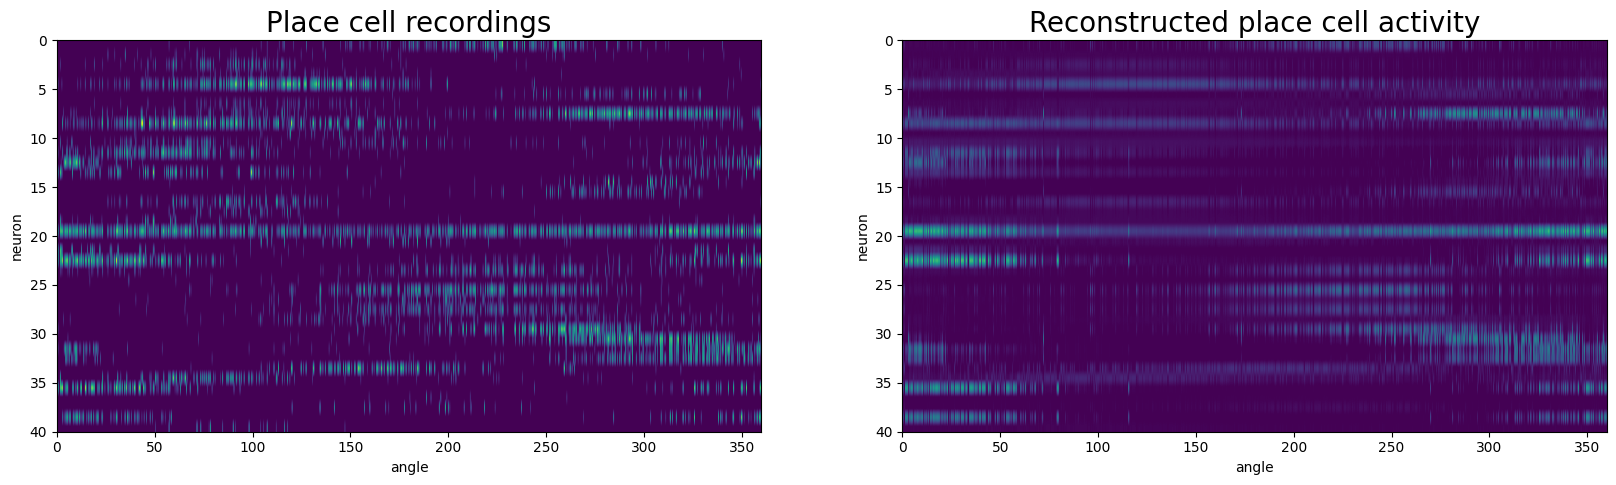

In [6]:
import matplotlib as mpl

color_norm = mpl.colors.Normalize(0.0, np.max(sorted_dataset))

fig = plt.figure(figsize=(20, 10))

ax_data = fig.add_subplot(121)

ax_data.set_xlabel("angle")
ax_data.set_ylabel("neuron")

ax_data.set_title("Place cell recordings", fontsize=20)

im_data = ax_data.imshow(
    sorted_dataset.T, extent=[0, 360, 40, 0], aspect=5, norm=color_norm, cmap="viridis"
)

ax_rec = fig.add_subplot(122)

ax_rec.set_xlabel("angle")
ax_rec.set_ylabel("neuron")

ax_rec.set_title("Reconstructed place cell activity", fontsize=20)

im_rec = ax_rec.imshow(
    sorted_rec.T, extent=[0, 360, 40, 0], aspect=5, norm=color_norm, cmap="viridis"
)

Text(0.5, 1.0, 'Reconstructed activity distribution')

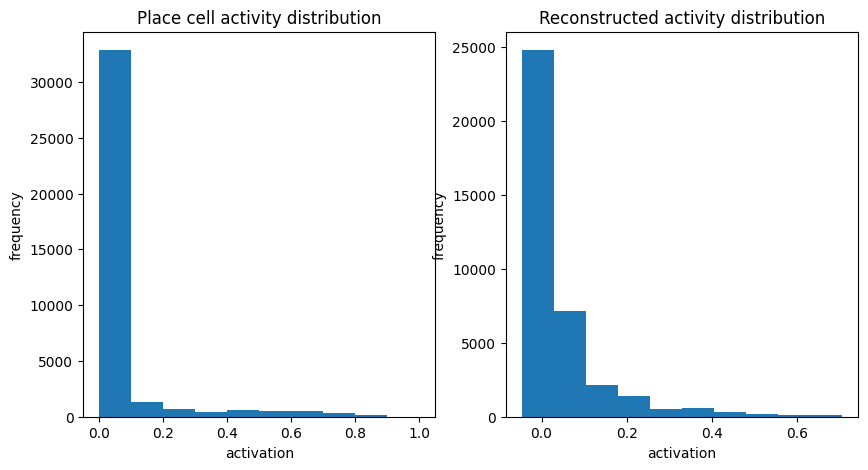

In [7]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121)

ax1.hist(sorted_dataset.flatten())

ax2 = fig.add_subplot(122)

ax2.hist(sorted_rec.flatten())

ax1.set_xlabel("activation")

ax1.set_ylabel("frequency")

ax2.set_xlabel("activation")

ax2.set_ylabel("frequency")

ax1.set_title("Place cell activity distribution")

ax2.set_title("Reconstructed activity distribution")